# Model Training and Model Comparison

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Classification Models for Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix 

In [2]:
df_iqr = pd.read_csv("C:/Users/USER/OneDrive/Desktop/Data Science & ML/Python/Assignments/EDA.csv")

In [3]:
df_iqr

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.22862,1.000000,0.951888,0.2419,0.07871,...,17.33,0.668310,1.000000,0.16220,0.62695,0.7119,0.2654,0.41915,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.307709,0.454072,0.1812,0.05667,...,23.41,0.539818,1.000000,0.12380,0.18660,0.2416,0.1860,0.27500,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.698984,0.827644,0.2069,0.05999,...,25.53,0.508442,0.869823,0.14440,0.42450,0.4504,0.2430,0.36130,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.22862,0.854786,0.680752,0.2597,0.07875,...,26.50,0.241347,0.218341,0.20980,0.62695,0.6869,0.2575,0.41915,0.12301,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.701108,0.674928,0.1809,0.05883,...,16.67,0.506948,0.793333,0.13740,0.20500,0.4000,0.1625,0.23640,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1326.3,0.11100,0.11590,0.863638,0.898826,0.1726,0.05623,...,26.40,0.576174,1.000000,0.14100,0.21130,0.4107,0.2216,0.20600,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.509897,0.633578,0.1752,0.05533,...,38.25,0.520892,0.882381,0.11660,0.19220,0.3215,0.1628,0.25720,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.327573,0.343094,0.1590,0.05648,...,34.12,0.379949,0.535891,0.11390,0.30940,0.3403,0.1418,0.22180,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.22862,1.000000,0.983596,0.2397,0.07016,...,39.42,0.668310,0.933756,0.16500,0.62695,0.7855,0.2650,0.40870,0.12301,0


In [4]:
# feature target selection

# features
x = df_iqr.drop(columns='target')

#target
y = df_iqr['target']


In [5]:
st = StandardScaler()

In [6]:
x_scaled = st.fit_transform(x)

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [8]:
x_train.shape

(455, 30)

In [9]:
x_test.shape

(114, 30)

# Classification Models

### LogisticRegression

In [10]:
model_logReg = LogisticRegression()

# Model Training
model_logReg.fit(x_train, y_train)

LogisticRegression()

In [11]:
y_pred = model_logReg.predict(x_test)

In [12]:
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0], dtype=int64)

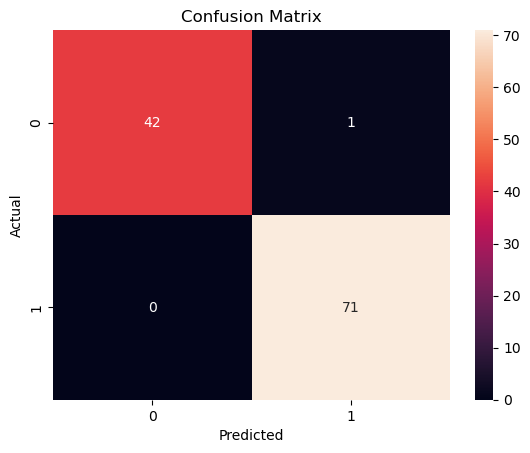

In [13]:
conf = confusion_matrix(y_test,y_pred)
plt.title('Confusion Matrix')
sns.heatmap(conf, xticklabels = model_logReg.classes_, yticklabels= model_logReg.classes_, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [14]:
cls_reg = classification_report(y_test, y_pred)
print(cls_reg)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.99      1.00      0.99        71

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



In [15]:
acc_reg = accuracy_score(y_test, y_pred)
print(acc_reg)

0.9912280701754386


### DecisionTreeClassifier

In [16]:
model_Tree = DecisionTreeClassifier()
# Model Training
model_Tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [17]:
y_pred_Tree = model_Tree.predict(x_test)

In [18]:
y_pred_Tree

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0], dtype=int64)

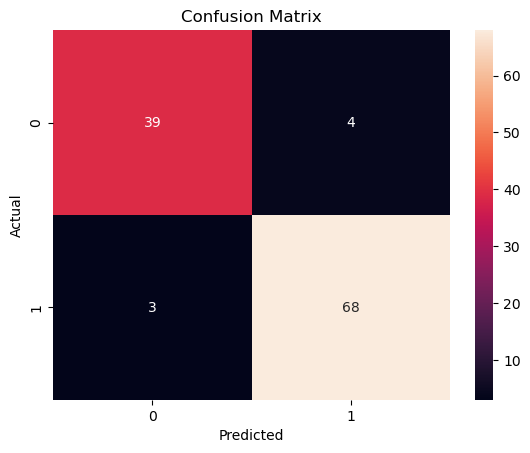

In [19]:
conf_Tree = confusion_matrix(y_test, y_pred_Tree)
plt.title('Confusion Matrix')
sns.heatmap(conf_Tree,xticklabels= model_Tree.classes_, yticklabels = model_Tree.classes_, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [20]:
clS_Tree = classification_report(y_test, y_pred_Tree)
print(clS_Tree)

              precision    recall  f1-score   support

           0       0.93      0.91      0.92        43
           1       0.94      0.96      0.95        71

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



In [21]:
acc_tree = accuracy_score(y_test, y_pred_Tree)
print(acc_tree)

0.9385964912280702


### SVM - SVC

In [22]:
model_svc = SVC()

# Model Training
model_svc.fit(x_train, y_train)

SVC()

In [23]:
y_pred_svc = model_svc.predict(x_test)

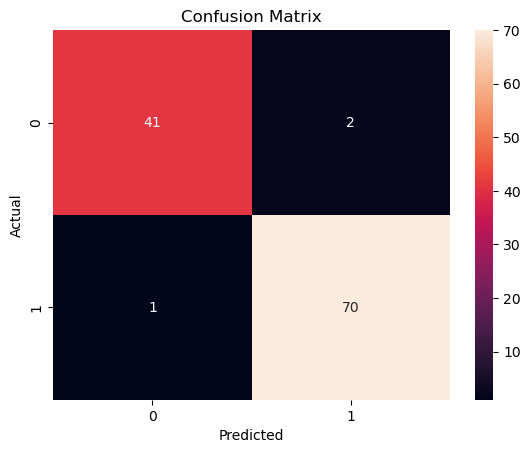

In [24]:
conf_svc = confusion_matrix(y_test, y_pred_svc)
plt.title('Confusion Matrix')
sns.heatmap(conf_svc,xticklabels= model_svc.classes_, yticklabels = model_svc.classes_, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [25]:
cls_svc = classification_report(y_test, y_pred_svc)
print(cls_svc)

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [26]:
acc_svc = accuracy_score(y_test, y_pred_svc)
print(acc_svc)

0.9736842105263158


### RandomForestClassifier

In [27]:
model_Ranfc = RandomForestClassifier()

# Model Training
model_Ranfc.fit(x_train, y_train)

RandomForestClassifier()

In [28]:
y_pred_ranfc = model_Ranfc.predict(x_test)

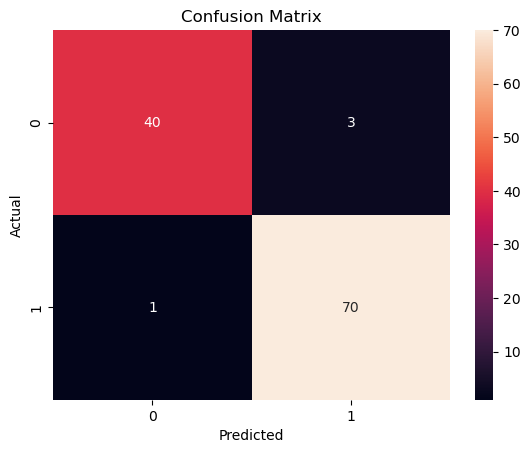

In [29]:
conf_ranfc = confusion_matrix(y_test, y_pred_ranfc)
plt.title('Confusion Matrix')
sns.heatmap(conf_ranfc,xticklabels= model_Ranfc.classes_, yticklabels = model_Ranfc.classes_, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [30]:
cls_Ranfc = classification_report(y_test, y_pred_ranfc)
print(cls_Ranfc)

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [31]:
acc_Ranfc = accuracy_score(y_test, y_pred_ranfc)
print(acc_Ranfc)

0.9649122807017544


### KNeighborsClassifier

In [32]:
model_knn = KNeighborsClassifier(n_neighbors=7)

# model training
model_knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [33]:
y_pred_knn = model_knn.predict(x_test)

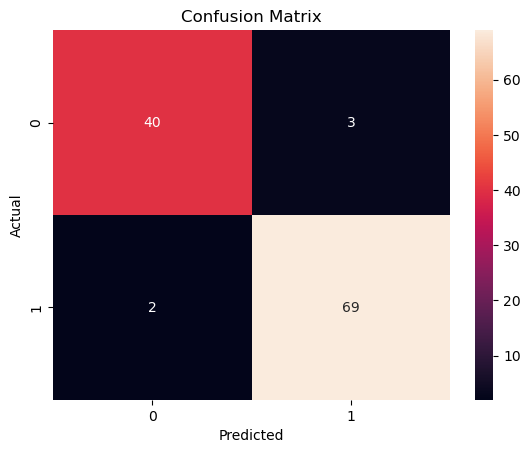

In [34]:
conf_knn = confusion_matrix(y_test, y_pred_knn)
plt.title('Confusion Matrix')
sns.heatmap(conf_knn,xticklabels= model_knn.classes_, yticklabels = model_knn.classes_, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [35]:
cls_knn = classification_report(y_test, y_pred_knn)
print(cls_knn)

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [36]:
acc_knn = accuracy_score(y_test, y_pred_knn)
print(acc_knn)

0.956140350877193


## Comparison

In [37]:
result = pd.DataFrame({'Models':['LogisticRegression','Decision Tree Classifier',
                                 'Random Forest Classifier', 'Support Vector Machine',
                                 'k-Nearest Neighbors'],
                       'Accuracy':[acc_reg,acc_tree,acc_Ranfc,acc_svc,acc_knn]})
result

,Models,Accuracy
0,LogisticRegression,0.991228
1,Decision Tree Classifier,0.938596
2,Random Forest Classifier,0.964912
3,Support Vector Machine,0.973684
4,k-Nearest Neighbors,0.956140


in general, Random Forest and SVM often perform well on this type of dataset. However, The best performing algorithms are k-Nearest Neighbors, Decision Tree Classifier, Random Forest Classifier because except all other algorithms are overfit.